In [39]:
! pip install colorspacious

In [40]:
import pandas as pd
from matplotlib import pyplot as plt
import os
import seaborn as sns
import numpy as np
from scipy.stats import linregress
import matplotlib as mpl
from matplotlib import cm
from colorspacious import cspace_converter
from collections import OrderedDict

cmaps = OrderedDict()

In [2]:
renewable_data_path= "renewable_production_bill_btu.csv"
renewable_state_df = pd.read_csv(renewable_data_path)
renewable_state_df=renewable_state_df.rename(columns={"Unnamed: 0":"State"})
renewable_state_df.set_index("State")

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
State,,,,,,,,,,,
AL,234001,264530,242243,255849,242204,313665,270743,258941,230731,254958,276734
AK,12913,15685,16965,16078,17796,18629,19790,23807,25120,23608,24117
AZ,96752,80898,85935,113360,98806,98958,120149,129266,139231,148625,154992
AR,124882,125695,126235,124987,114237,121310,119813,117808,115408,115289,125039
CA,604499,647227,715878,838547,705086,744983,749645,738814,932768,1120569,1023623
CO,80070,80116,82190,104147,102686,116979,125648,123965,147499,150632,154200
CT,26358,29529,30357,30760,26910,30046,32677,33236,34222,33502,38245
DC,65,49,114,290,285,305,344,824,1107,1316,1603
DE,2952,3577,3838,4172,3581,3795,4224,3517,3102,3268,3384


In [3]:
emissions_data_path= "EmissionsData.csv"
emissions_state_df = pd.read_csv(emissions_data_path)
emissions_state_df=emissions_state_df.rename(columns={"Unnamed: 0":"State"})
emissions_state_df.set_index("State")

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
State,,,,,,,,,,
AL,139.666603,120.020443,132.722932,129.812612,123.039324,120.732885,123.080771,120.012608,114.872696,109.018634
AK,39.435905,37.788246,38.729384,38.585774,38.039447,35.975289,35.171091,36.067852,34.739390,34.295441
AZ,102.125070,93.252826,95.204594,93.282044,91.256850,95.060822,93.120620,90.856296,86.971877,86.137839
AR,64.059757,61.367031,65.723403,67.168798,65.940126,68.354108,68.985869,59.176044,62.319791,64.277677
CA,379.480916,366.184902,360.953079,346.864178,351.496006,354.219000,351.477053,359.290429,359.261859,360.913489
CO,97.064224,92.931686,95.398725,91.694520,90.609881,91.185686,91.833738,90.542532,87.183832,87.582932
CT,37.476760,35.720615,36.050835,34.650855,33.929278,34.664613,34.950955,36.290105,34.086323,33.578603
DC,3.078350,3.171786,3.209717,3.080198,2.648655,2.826738,3.019301,2.984181,2.768008,2.634548
DE,15.588371,11.939328,11.232065,12.191584,13.316142,13.046189,12.685983,12.786006,13.240562,12.339543


In [13]:
x_values = list(emissions_state_df[['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']].values)
y_values = list(renewable_state_df[['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']].values)

In [14]:
x_values = np.concatenate(x_values, axis =0)
y_values = np.concatenate(y_values, axis =0)

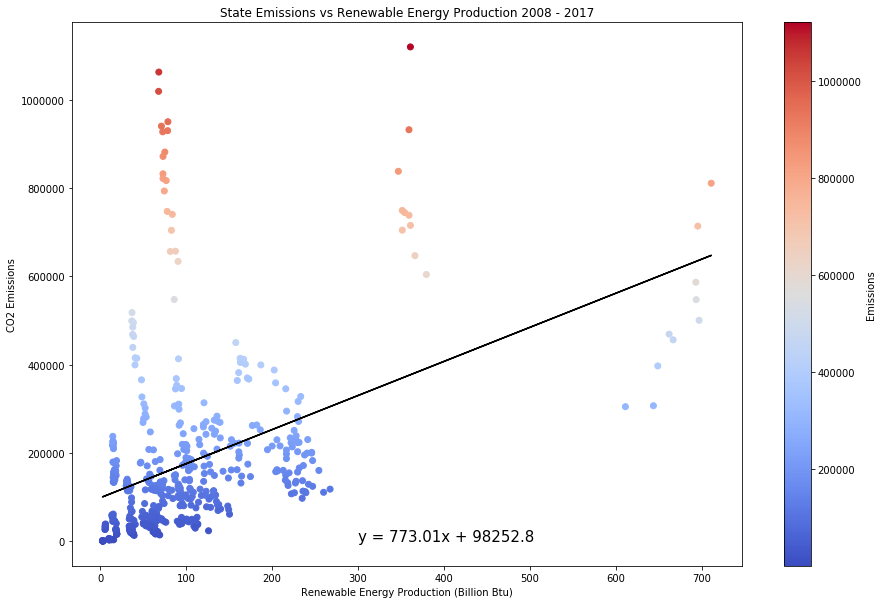

0.18697207374556615


In [54]:
plt.figure(figsize=(15,10))
plt.scatter(x_values, y_values, c=y_values, cmap='coolwarm')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
clb = plt.colorbar()
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.title("State Emissions vs Renewable Energy Production 2008 - 2017")
plt.plot(x_values, regress_values, "black")
plt.annotate(line_eq, (300,100), fontsize = 15, color="black")
plt.xlabel('Renewable Energy Production (Billion Btu)')
plt.ylabel('CO2 Emissions')
clb.set_label('Emissions')
plt.show()
print(rvalue**2)